<a href="https://colab.research.google.com/github/spalominor/SS202501/blob/main/SS_Taller02_23042025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución del problema

Oferta (millones) | Utilidad Promedio (millones)
-----------------------------------------------
            10500 |                   -1129.25
            11000 |                    -651.53
            11500 |                    -259.60
            12000 |                      18.93
            12500 |                     185.71
            13000 |                     241.31
            13500 |                     222.95
            14000 |                     113.87
            14500 |                     -11.02
            15000 |                    -137.31


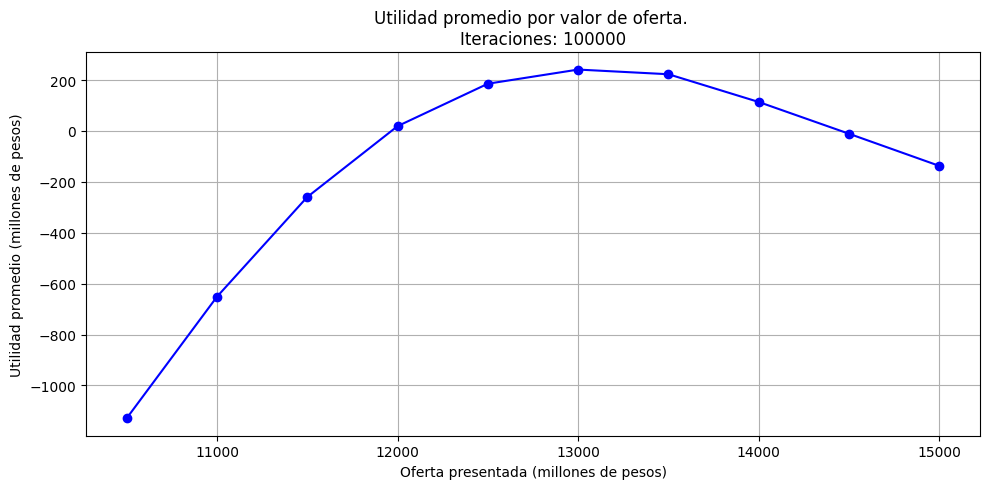

In [47]:
# Librerías necesarias para la simulación
# random: para generar números aleatorios
# math: para operaciones matemáticas como la raíz cuadrada
# NumPy: para crear arreglos inteligentes de manera fácil
# MatPlotLib: para generar gráficas ilustrativas
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Función básica para generar un valor simulado usando la distribución triangular
def generar_triangular(min, max, mod):
    """
    Genera un valor simulado usando la distribución triangular.

    Esta función utiliza el método de inversión para generar una observación
    aleatoria de una distribución triangular con los siguientes parámetros:
    - Mínimo (a) = min
    - Moda (c) = mod
    - Máximo (b) = max

    Returns:
        float: Observación aleatoria simulada del costo.
    """
    a = min
    b = max
    c = mod
    r = random.random()
    r1 = (c - a) / (b - a)

    if r <= r1:
        obs = a + math.sqrt(r * (b - a) * (c - a))
    else:
        obs = b - math.sqrt((1 - r) * (b - a) * (b - c))

    return round(obs, 2)


def simular_competidores(base, multiplicadores, competidores):
    """
    Función que simula los precios de la oferta de los competidores.
    Simula los precios de la oferta que presentarán los competidores en una
    licitación.

    Args:
        base (float): Precio base de referencia.
        multiplicadores (list): Lista con los parámetros [mínimo, máximo, moda]
            de la distribución triangular usada para generar el multiplicador.
        competidores (int): Número de competidores a simular.

    Returns:
        list: Lista con los precios simulados de los competidores. Si un
            competidor no participa, su valor será 0.
    """
    precios_competidores = []
    for i in range(competidores):
        if random.random() > 0.5:
            multiplicador = generar_triangular(multiplicadores[0],
                                               multiplicadores[1],
                                               multiplicadores[2])
            precio_competidor = base * multiplicador
            precios_competidores.append(precio_competidor)
        else:
            precios_competidores.append(0)

    return precios_competidores


def es_oferta_ganadora(mi_oferta, oferta_competidores):
    """
    Función que verifica si la oferta es ganadora.
    Verifica si la oferta presentada por la empresa es ganadora comparándola
    con las ofertas de los competidores.

    Args:
        oferta (float): Oferta presentada por la empresa.
        oferta_competidores (list): Lista de ofertas presentadas por los
        competidores.

    Returns:
        bool: True si la oferta es ganadora, False en caso contrario.
    """
    M = 999999999
    oferta_competidores = [
        oferta if oferta != 0 else M for oferta in oferta_competidores]
    es_ganadora = mi_oferta == min(oferta_competidores + [mi_oferta])

    return es_ganadora


def calcular_utilidad(oferta, es_ganadora):
    """
    Función que calcula la utilidad de la oferta ganadora.
    Calcula el costo total de la oferta, considerando el costo fijo y variable.

    Args:
        oferta (float): Oferta presentada por la empresa.
        es_ganadora (bool): Indica si la oferta es ganadora.

    Returns:
        float: Valor total de la utilidad.
    """
    costo_fijo = generar_triangular(min=300, max=500, mod=350)
    costo_variable = 0

    if es_ganadora:
        costo_variable = generar_triangular(min=9000, max=15000, mod=10000)
        utilidad = oferta - costo_fijo - costo_variable
        return utilidad

    utilidad = - costo_fijo
    return utilidad


def simular_licitacion(oferta, base, multiplicadores, competidores):
    """
    Función que simula una licitación completa.
    Simula una licitación completa, desde la oferta presentada por la empresa
    hasta el cálculo de la utilidad obtenida.

    Args:
        oferta (float): Oferta presentada por la empresa.
        base (float): Precio base de referencia para los competidores.
        multiplicadores (list): Lista de multiplicadores para generar los costos
        simulados de cada competidor.
        competidores (int): Número de competidores en la licitación.

    Returns:
        float: Valor de la utilidad obtenida en la licitación.
    """
    oferta_competidores = simular_competidores(base,
                                               multiplicadores,
                                               competidores)
    es_ganadora = es_oferta_ganadora(oferta, oferta_competidores)
    utilidad = calcular_utilidad(oferta, es_ganadora)

    return utilidad


def simular_decision(iteraciones, ofertas_disponibles, base, multiplicadores,
                     competidores):
    """
    Función que simula múltiples licitaciones para diferentes ofertas.
    Simula múltiples licitaciones para diferentes ofertas y calcula la utilidad
    promedio para cada oferta.

    Args:
        iteraciones (int): Número de iteraciones de simulación por oferta.
        ofertas_disponibles (list): Lista de ofertas a evaluar.
        base (float): Precio base de referencia usado por los competidores.
        multiplicadores (list): Parámetros para generar los precios simulados.
        competidores (int): Número de competidores en cada licitación.

    Returns:
        dict: Diccionario con las ofertas como claves y la utilidad promedio
        como valores.
    """
    utilidades_totales = {}
    for oferta in ofertas_disponibles:
        utilidades_oferta = 0
        for i in range(iteraciones):
            utilidad = simular_licitacion(oferta,
                                          base,
                                          multiplicadores,
                                          competidores)
            utilidades_oferta += utilidad
        utilidades_totales[oferta] = utilidades_oferta / iteraciones

    return utilidades_totales


# Función que grafica las utilidades promedio obtenidas para cada oferta
def graficar_utilidades(resultados, iteraciones):
    """
    Grafica las utilidades promedio obtenidas para cada oferta simulada.

    Args:
        resultados (dict): Diccionario con pares de (oferta, utilidad promedio).

    Returns:
        None: plt.show() Muestra la gráfica generada.
    """
    ofertas = list(resultados.keys())
    utilidades = list(resultados.values())

    plt.figure(figsize=(10, 5))
    plt.plot(ofertas, utilidades, marker='o', linestyle='-', color='blue')
    plt.title(f"""Utilidad promedio por valor de oferta.
    Iteraciones: {iteraciones}""")
    plt.xlabel("Oferta presentada (millones de pesos)")
    plt.ylabel("Utilidad promedio (millones de pesos)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Definir las condiciones específicas de la simulación
ofertas_disponibles = np.arange(10500, 15500, 500)
iteraciones = 100000
base = 10000
multiplicadores = [0.9, 1.3, 1.8]
competidores = 4

# Simular todo el problema dadas las condiciones
resultados = simular_decision(iteraciones=iteraciones,
                              ofertas_disponibles=ofertas_disponibles,
                              base=base,
                              multiplicadores=multiplicadores,
                              competidores=competidores)

# Imprimir los resultados de manera legible
print("Oferta (millones) | Utilidad Promedio (millones)")
print("-----------------------------------------------")
for oferta, utilidad in resultados.items():
    print(f"{int(oferta):>17} | {utilidad:>26.2f}")

# Llamar la función que genera la gráfica
graficar_utilidades(resultados, iteraciones=iteraciones)

# Toma de decisiones


# ¿Cuál es la mejor decisión?
Ofertar 13 mill millones de pesos

In [48]:
# Recorrer el diccionario de resultados en búsqueda de la mejor oferta posible
mejor_oferta = max(resultados, key=resultados.get)
print(f"La oferta óptima es {mejor_oferta} millones de pesos")
print(f"La utilidad promedio obtenida es {resultados[mejor_oferta]:.2f}")

La oferta óptima es 13000 millones de pesos
La utilidad promedio obtenida es 241.31


# ¿Cuál será la utilidad aproximada para la mejor oferta?

Queremos estimar la utilidad promedio de la mejor oferta, pero con una precisión:

- Error máximo permitido: ±5 millones de pesos.

- Nivel de confianza: 95%. (Nivel de significancia arbitrario)

Para eso necesitamos calcular el tamaño de muestra mínimo usando estadística:

- La fórmula clásica para determinar el tamaño de muestra para una media es:

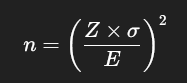

donde:

- n = Tamaño de muestra necesario.

- Z = Valor Z para un 95% de confianza (Z ≈ 1.96).

- σ = Desviación estándar de la utilidad.

- E = Error máximo tolerado (5 millones).

# Calculemos la desviación estándar muestral

In [49]:
# Crear una lista vacía para almacenar las utilidades simuladas
utilidades_muestra = []

# Iterar "n" veces para realizar simulaciones independientes
for i in range(iteraciones):

    # Simular una licitación usando la mejor oferta encontrada
    utilidad = simular_licitacion(oferta=mejor_oferta,
                                  base=base,
                                  multiplicadores=multiplicadores,
                                  competidores=competidores)

    # Agregar la utilidad obtenida a la lista de muestras
    utilidades_muestra.append(utilidad)

# Convertir la lista de utilidades simuladas en un arreglo de NumPy
muestra_array = np.array(utilidades_muestra)

# Calcular la media muestral
media_muestral = np.mean(muestra_array)

# Calcular la desviación estándar muestral
# "Degres of freedom (ddof) igual a 1, pues es el cálculo dada una muestra"
desviacion_estandar = np.std(muestra_array, ddof=1)

# Imprimir el resultado de forma legible
print(f"""La desviación estándar muestral de la utilidad es: {
    desviacion_estandar:.2f}""")


La desviación estándar muestral de la utilidad es: 1142.32


# Calcular el número mínimo de iteraciones
Se necesitan aproximadamente 200 mil iteraciones

In [50]:
# Definir el valor Z para un 95% de confianza
z = 1.96

# Definir el error máximo tolerado en millones de pesos
error_maximo = 5

# Calcular el tamaño de muestra necesario
n_requerido = (z * desviacion_estandar / error_maximo) ** 2

# Redondear al siguiente número entero, hacia arriba
n_requerido = int(np.ceil(n_requerido))

# Imprimir el tamaño de muestra requerido
print(f"Se necesitan al menos {n_requerido} simulaciones.")

Se necesitan al menos 200517 simulaciones.


# Calcular un intervalo de confianza
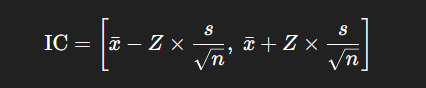

In [51]:
# Contar el número de iteraciones "n"
n = len(muestra_array)

# Definir el error estandar según "n" iteraciones
error_estandar = desviacion_estandar / np.sqrt(n)

# Calcular los límites inferior y superior del intervalo
limite_inferior = media_muestral - z * error_estandar
limite_superior = media_muestral + z * error_estandar

# Imprimir los resultados
print(f"El intervalo de confianza del 95% es: "
      f"({limite_inferior:.2f}, {limite_superior:.2f}) millones de pesos")

El intervalo de confianza del 95% es: (235.90, 250.06) millones de pesos
